In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r"C:\Users\SOURAV\Downloads\4743416-text_filess\sample_text.csv")

In [3]:
for i in df['text']:
    print(set(i.lower().split()))

{'analyst', 'i', 'am', 'data'}
{'data', 'scientist', 'analyst,', 'engineer', 'and', 'i', 'am'}
{'engineer', 'ml', 'and', 'i', 'am', 'ai'}


# Bag of Words

In [9]:
!pip install scikit-learn

In [6]:
pip install --upgrade pip

  Using cached pip-25.3-py3-none-any.whl.metadata (4.7 kB)
Using cached pip-25.3-py3-none-any.whl (1.8 MB)
  Attempting uninstall: pip
    Found existing installation: pip 25.0.1
    Uninstalling pip-25.0.1:
      Successfully uninstalled pip-25.0.1
Note: you may need to restart the kernel to use updated packages.


In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
bow = CountVectorizer(stop_words='english')

In [16]:
bow.fit_transform(df['text']).toarray()   #Vocabulary

array([[0, 1, 1, 0, 0, 0],
       [0, 1, 3, 1, 0, 1],
       [1, 0, 0, 2, 1, 0]], dtype=int64)

In [17]:
bow.vocabulary_

{'data': 2, 'analyst': 1, 'scientist': 5, 'engineer': 3, 'ml': 4, 'ai': 0}

In [18]:
bow.get_feature_names_out()   #To get column names after learning vocabulary

array(['ai', 'analyst', 'data', 'engineer', 'ml', 'scientist'],
      dtype=object)

In [19]:
pd.DataFrame(bow.fit_transform(df['text']).toarray(), columns=bow.get_feature_names_out())

,ai,analyst,data,engineer,ml,scientist
0,0,1,1,0,0,0
1,0,1,3,1,0,1
2,1,0,0,2,1,0


In [20]:
# bow - bag of words

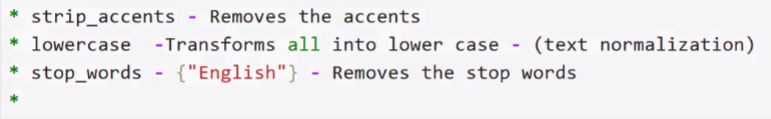

* max_features - ignores more than n no of features
* min_df - the word should be occured almost in a document
* max_df - the word should be occured

# ngrams

In [39]:
bow = CountVectorizer(stop_words='english',ngram_range=(1,2), max_features= 7)
pd.DataFrame(bow.fit_transform(df['text']).toarray(), columns=bow.get_feature_names_out())

,ai,ai engineer,analyst,analyst data,data,data analyst,engineer
0,0,0,1,0,1,1,0
1,0,0,1,1,3,1,1
2,1,1,0,0,0,0,2


In [40]:
df['text']

0                                    I am data analyst
1    I am data analyst, data scientist and data eng...
2                     I am ML engineer and AI engineer
Name: text, dtype: object

In [41]:
bow = CountVectorizer(stop_words='english',ngram_range=(1,2), max_df= 2)
pd.DataFrame(bow.fit_transform(df['text']).toarray(), columns=bow.get_feature_names_out())

,ai,ai engineer,analyst,analyst data,data,data analyst,data engineer,data scientist,engineer,engineer ai,ml,ml engineer,scientist,scientist data
0,0,0,1,0,1,1,0,0,0,0,0,0,0,0
1,0,0,1,1,3,1,1,1,1,0,0,0,1,1
2,1,1,0,0,0,0,0,0,2,1,1,1,0,0


In [54]:
bow = CountVectorizer(stop_words='english',ngram_range=(1,2), min_df= 2)
pd.DataFrame(bow.fit_transform(df['text']).toarray(), columns=bow.get_feature_names_out())

,analyst,data,data analyst,engineer
0,1,1,1,0
1,1,3,1,1
2,0,0,0,2


In [52]:
bow = CountVectorizer(stop_words='english',ngram_range=(1,1), max_df= 1)
pd.DataFrame(bow.fit_transform(df['text']).toarray(), columns=bow.get_feature_names_out())

,ai,ml,scientist
0,0,0,0
1,0,0,1
2,1,1,0


In [55]:
bow.vocabulary_

{'data': 1, 'analyst': 0, 'data analyst': 2, 'engineer': 3}

In [56]:
new_voc = {'data': 1, 'analyst': 0, 'data analyst': 2, 'engineer': 3}
bow = CountVectorizer(stop_words='english', vocabulary= new_voc)
pd.DataFrame(bow.fit_transform(df['text']).toarray(), columns=bow.get_feature_names_out())

,analyst,data,data analyst,engineer
0,1,1,0,0
1,1,3,0,1
2,0,0,0,2


# Binary Bag of Words

In [57]:
bow = CountVectorizer(stop_words='english', binary=True)
pd.DataFrame(bow.fit_transform(df['text']).toarray(), columns=bow.get_feature_names_out())

,ai,analyst,data,engineer,ml,scientist
0,0,1,1,0,0,0
1,0,1,1,1,0,1
2,1,0,0,1,1,0
